# Data Set Bebida
Aula SAS

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm

In [3]:
data = pd.read_sas('a8_mbebida.sas7bdat')

data['Month'] = pd.date_range(start='2022-01-01', periods=len(data), freq='M')

# coluna 'Month' como o índice do DataFrame
data.set_index('Month', inplace=True)

print(data.head())

            bebida
Month             
2022-01-31   56.92
2022-02-28   49.67
2022-03-31   49.63
2022-04-30   53.84
2022-05-31   57.49


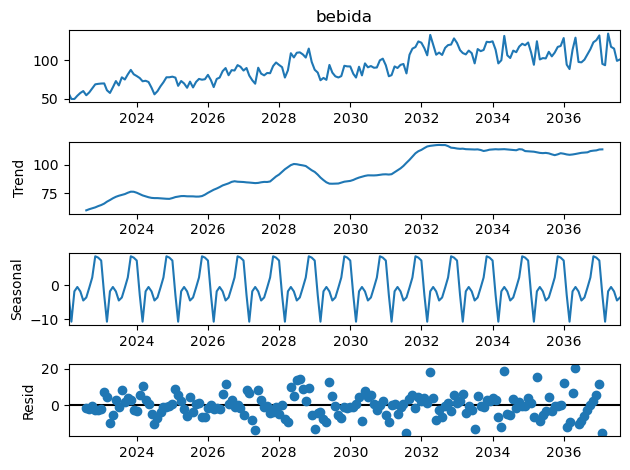

In [4]:
# Decomposição
decomposition = seasonal_decompose(data['bebida'])

# Plote a decomposição
decomposition.plot()
plt.show()

In [5]:
data.index.min()

Timestamp('2022-01-31 00:00:00')

In [6]:
data.index.max()

Timestamp('2037-07-31 00:00:00')

In [7]:
train = data.iloc[:175]
teste = data.iloc[-12:]

In [8]:
print(teste)

            bebida
Month             
2036-08-31  107.58
2036-09-30  114.39
2036-10-31  123.33
2036-11-30  126.08
2036-12-31  132.26
2037-01-31   95.26
2037-02-28   93.55
2037-03-31  134.62
2037-04-30  117.45
2037-05-31  115.11
2037-06-30   99.17
2037-07-31  101.10


In [9]:
stepwise_model = auto_arima(data, start_p=1, start_q=1, max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True,
                           error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1359.345, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1290.504, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1291.800, Time=0.27 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1304.166, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1291.625, Time=0.13 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1300.315, Time=0.14 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1292.612, Time=0.32 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1312.558, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1246.644, Time=0.12 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1248.045, Time=0.43 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1256.976, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1247.829, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1248.617, Time=0.57 sec
 ARIM

In [10]:
print(stepwise_model.aic())

1246.6444081584063


In [12]:
print(stepwise_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  187
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -620.322
Date:                            Mon, 25 Sep 2023   AIC                           1246.644
Time:                                    11:03:05   BIC                           1256.122
Sample:                                01-31-2022   HQIC                          1250.489
                                     - 07-31-2037                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5510      0.056     -9.776      0.000      -0.662      -0.441
ma.S.L12      -0.6884      0.059   

### Considerações

O modelo ainda tem heterocedasticidade, o que pode sugerir que faltam variáveis preditoras.

ma.L1 e ma.S.L11 significativos.

Ljung-Box sem autocorrelação.

<Figure size 1200x600 with 0 Axes>

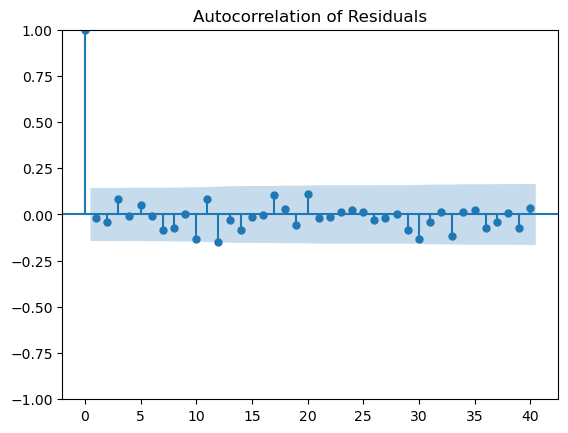

<Figure size 1200x600 with 0 Axes>

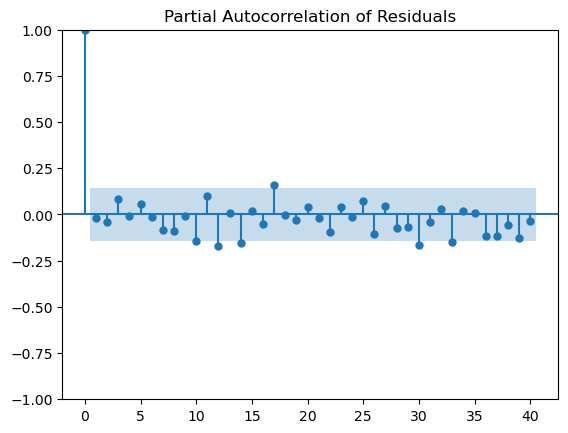

In [14]:
residuals_stepwise_model = stepwise_model.resid()

plt.figure(figsize=(12, 6))
plot_acf(residuals_stepwise_model, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(residuals_stepwise_model, lags=40)
plt.title('Partial Autocorrelation of Residuals')
plt.show()

In [15]:
train = data.loc['2020-01-31':'2036-07-21']
test = data.loc['2036-08-31':]

In [16]:
print(test)

            bebida
Month             
2036-08-31  107.58
2036-09-30  114.39
2036-10-31  123.33
2036-11-30  126.08
2036-12-31  132.26
2037-01-31   95.26
2037-02-28   93.55
2037-03-31  134.62
2037-04-30  117.45
2037-05-31  115.11
2037-06-30   99.17
2037-07-31  101.10


In [17]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

<Axes: xlabel='Month'>

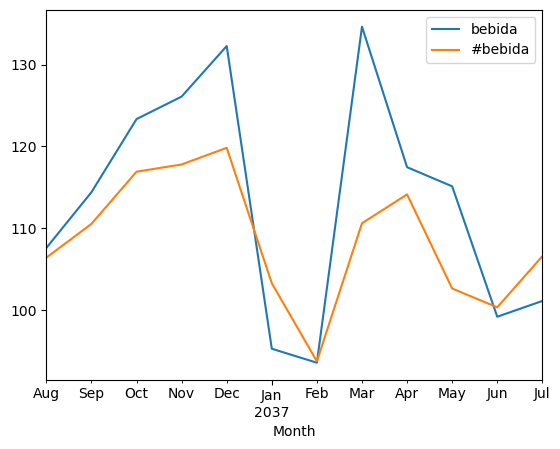

In [18]:
future_forecast = stepwise_model.predict(n_periods=13)
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['#bebida'])
pd.concat([test, future_forecast], axis = 1).plot()

<Axes: xlabel='Month'>

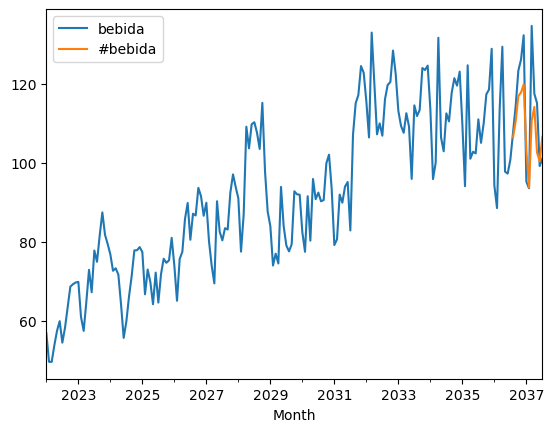

In [19]:
pd.concat([data, future_forecast], axis = 1).plot()

In [20]:
print(test['bebida'].shape)
print(future_forecast.shape)

(12,)
(12, 1)


In [21]:
future_forecast_series = future_forecast.iloc[:, 0]

comparison_df = pd.DataFrame({
    'Valores_Reais': test['bebida'],
    'Previsoes': future_forecast_series
})

# Imprima a tabela
print(comparison_df)

            Valores_Reais   Previsoes
Month                                
2036-08-31         107.58  106.392868
2036-09-30         114.39  110.520801
2036-10-31         123.33  116.900442
2036-11-30         126.08  117.784152
2036-12-31         132.26  119.818235
2037-01-31          95.26  103.265740
2037-02-28          93.55   93.721383
2037-03-31         134.62  110.602993
2037-04-30         117.45  114.121803
2037-05-31         115.11  102.619345
2037-06-30          99.17  100.325302
2037-07-31         101.10  106.571965


In [22]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(comparison_df['Valores_Reais'], comparison_df['Previsoes']))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 9.66370434792576


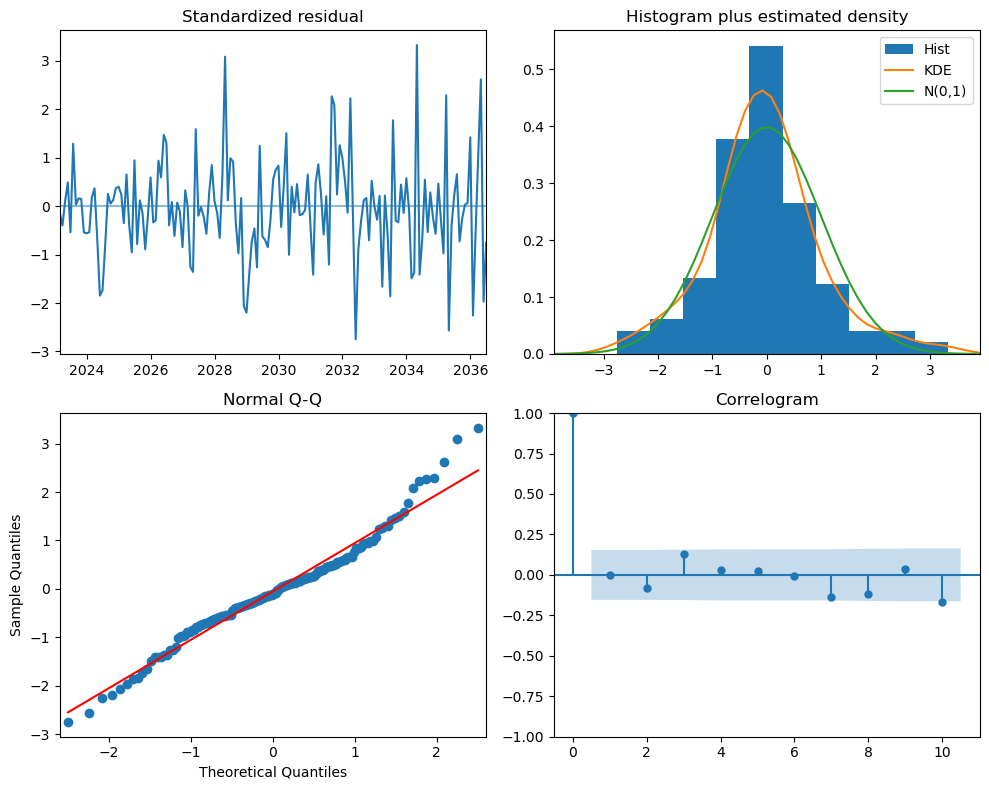

In [23]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

stepwise_model.plot_diagnostics(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [24]:
lb_result = sm.stats.acorr_ljungbox(residuals_stepwise_model, lags=40, return_df=True)
lb_p_value = lb_result['lb_pvalue'].iloc[0]

print(lb_result)
# Definir um nível de significância (alfa) como float
alfa = 0.05

# Verificar se o p-value no lag 40 é menor que o nível de significância
if lb_p_value < alfa:
    print("Há autocorrelação nos resíduos.")
else:
    print("Não há autocorrelação nos resíduos. Não há evidências significativas de autocorrelações residuais")

      lb_stat  lb_pvalue
1    0.073849   0.785812
2    0.377097   0.828160
3    1.653258   0.647375
4    1.666878   0.796725
5    2.136826   0.829907
6    2.152359   0.905166
7    3.529296   0.832113
8    4.517881   0.807642
9    4.517893   0.874150
10   8.127572   0.616377
11   9.532224   0.572888
12  14.146650   0.291442
13  14.341537   0.350239
14  15.866328   0.321605
15  15.897600   0.388890
16  15.898732   0.460051
17  18.310641   0.369502
18  18.470744   0.425070
19  19.200853   0.444021
20  21.860354   0.348136
21  21.949270   0.402438
22  21.981815   0.460975
23  22.033617   0.518223
24  22.186761   0.568121
25  22.214645   0.623321
26  22.410489   0.666042
27  22.476496   0.712790
28  22.478272   0.758683
29  24.043570   0.726780
30  28.011617   0.569821
31  28.365188   0.602258
32  28.403828   0.649252
33  31.638275   0.534870
34  31.692918   0.581193
35  31.861513   0.620412
36  33.056499   0.609345
37  33.441695   0.636631
38  33.466819   0.678994
39  34.818666   0.661016


In [25]:
print(stepwise_model.params())

ma.L1       -0.533273
ma.S.L12    -0.728223
sigma2      67.146156
dtype: float64
